# Statistics and More

In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import sys
import optparse
import subprocess
import random

import sqlite3

import csv

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns

import pygraphviz

import numpy as np

from matplotlib_venn import venn3,venn2

# import scipy

In [2]:
conn = sqlite3.connect('database.db')
conn.text_factory = str
c = conn.cursor()

## You need to run network.ipynb first to create the database

### Ethnicity

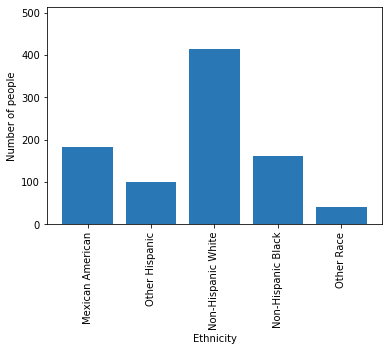

In [3]:


q = "SELECT COUNT(*) FROM basic_information bi JOIN patients AS p ON p.SEQN = bi.SEQN WHERE bi.RIDRETH1 = "

x = ("Mexican American","Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black",
     "Other Race", "Missing")
y = []
for row in c.execute(q+" 1"):
 y.append(int(row[0]))
for row in c.execute(q+" 2"):
 y.append(int(row[0]))
for row in c.execute(q+" 3"):
 y.append(int(row[0]))
for row in c.execute(q+" 4"):
 y.append(int(row[0]))
for row in c.execute(q+" 5"):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Ethnicity')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+100)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

### Gender

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36201b278>],
      dtype=object)

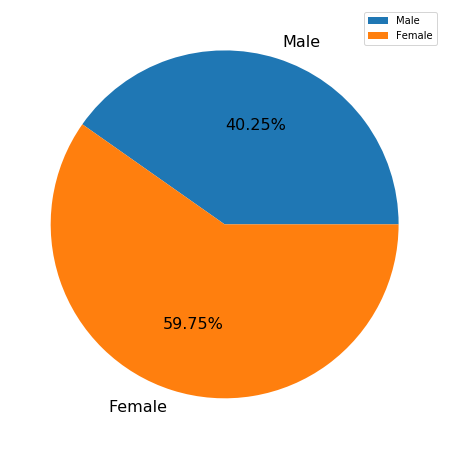

In [4]:
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 1"

x = ["Male", "Female"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 2"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

### Pain make it hard for usual activities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361e0ab70>],
      dtype=object)

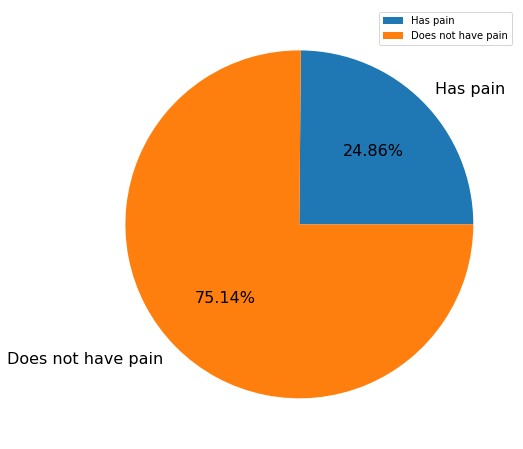

In [5]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1"
  
x = ["Has pain", "Does not have pain"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

### Pain and bowel health

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361f69cc0>],
      dtype=object)

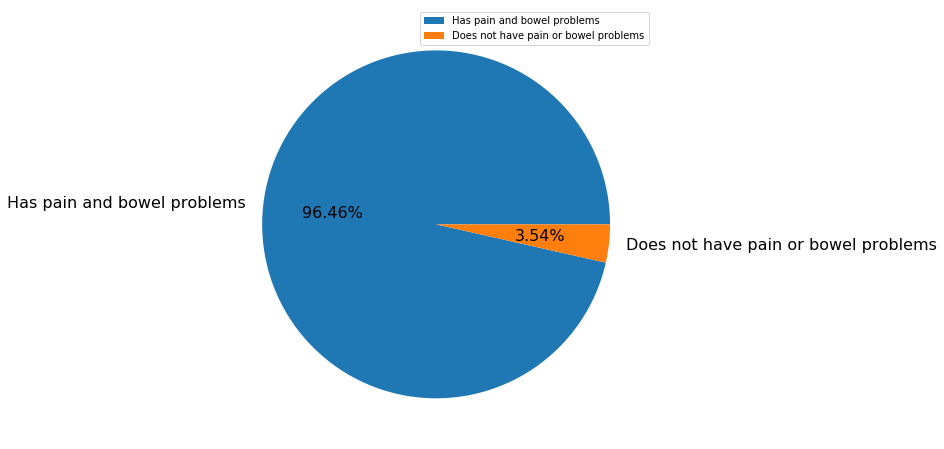

In [6]:
condition = "( bowel_health.BHQ010_b = 1 OR bowel_health.BHQ020_b = 1 OR bowel_health.BHQ030_b = 1 OR bowel_health.BHQ040_b = 1 OR bowel_health.BHD050_b = 1 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1 AND "+condition
  
x = ["Has pain and bowel problems", "Does not have pain or bowel problems"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
condition = "( bowel_health.BHQ010_b = 0 AND bowel_health.BHQ020_b = 0 AND bowel_health.BHQ030_b = 0 AND bowel_health.BHQ040_b = 0 AND bowel_health.BHD050_b = 0 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0 AND "+condition 
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

### Anxiety

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361f407b8>],
      dtype=object)

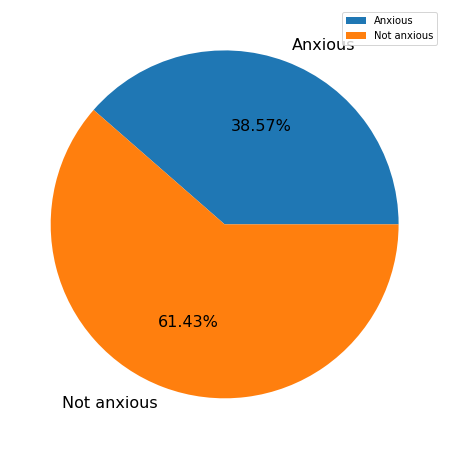

In [7]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 1"

x = ["Anxious", "Not anxious"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%',fontsize=16)

### Bowel problems

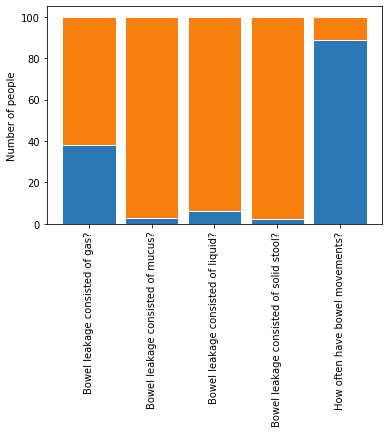

In [8]:
BHQ010 = 'Bowel leakage consisted of gas?'
BHQ020 = 'Bowel leakage consisted of mucus?'
BHQ030 = 'Bowel leakage consisted of liquid?'
BHQ040 = 'Bowel leakage consisted of solid stool?'
BHD050 = 'How often have bowel movements?'

yes = []
no = []
cond1 = ['bowel_health.BHQ010_b = 1', 'bowel_health.BHQ020_b = 1', 'bowel_health.BHQ030_b = 1', 'bowel_health.BHQ040_b = 1', 'bowel_health.BHD050_b = 1']
cond2 = ['bowel_health.BHQ010_b = 0', 'bowel_health.BHQ020_b = 0', 'bowel_health.BHQ030_b = 0', 'bowel_health.BHQ040_b = 0', 'bowel_health.BHD050_b = 0']

for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[0]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[0]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[1]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[1]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[2]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[2]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[3]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[3]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[4]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[4]):
 no.append(row[0])
    
# Data
r = [0,1,2,3,4]
raw_data = {'blueBars': yes, 'orangeBars': no}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['blueBars'], df['orangeBars'])]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.85
names = (BHQ010, BHQ020, BHQ030, BHQ040, BHD050)

plt.bar(r, blueBars, color='#2977b4', edgecolor='white', width=barWidth)

plt.bar(r, orangeBars, bottom=blueBars, color='#f77e0f', edgecolor='white', width=barWidth)

plt.xticks(r, names,rotation=90)

plt.ylabel("Number of people")
 
# Show graphic
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361e9a550>],
      dtype=object)

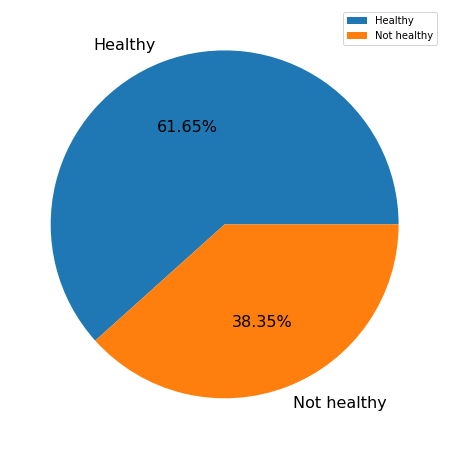

In [9]:
#How healthy is the diet?
x = ["Healthy", "Not healthy"]
y = []
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

### What they eat?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361bf3e80>],
      dtype=object)

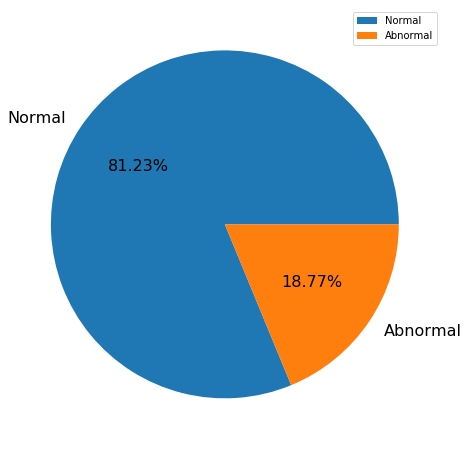

In [10]:
#ferritin
x = ["Normal", "Abnormal"]
y = []
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361bd2b00>],
      dtype=object)

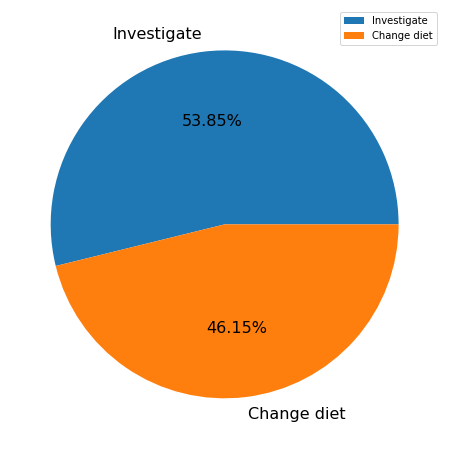

In [11]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361e6ab70>],
      dtype=object)

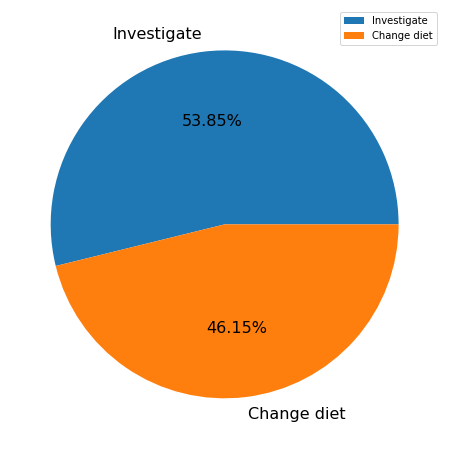

In [12]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

### Allergies statistics

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361bf3588>],
      dtype=object)

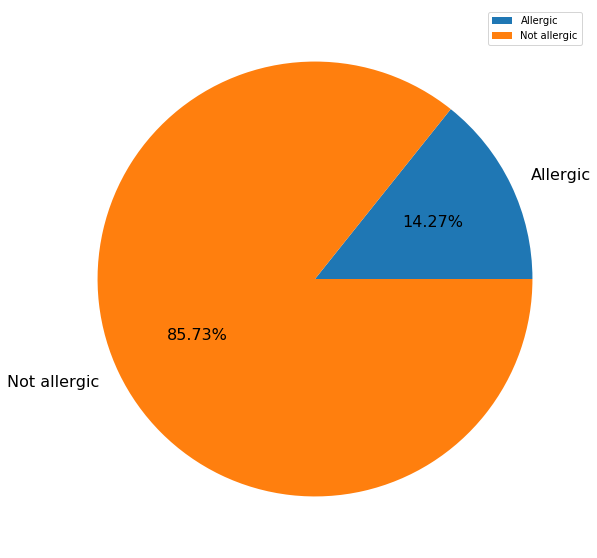

In [14]:
# DBQ920 - Having food allergies
# DBQ925a - Allergic to wheat
# DBQ925b - Allergic to cow's milk
# DBQ925c - Allergic to eggs
# DBQ925d - Allergic to fish
# DBQ925e - Allergic to shellfish
# DBQ925f - Allergic to corn
# DBQ925g - Allergic to peanut
# DBQ925h - Allergic to other nuts
# DBQ925i - Allergic to soy products
# DBQ925j - Allergic to other foods

x = ["Allergic", "Not allergic"]
y = []

query = "SELECT COUNT(*) FROM patients WHERE patients.DBQ920_b = 1"
for row in c.execute(query):
  y.append(int(row[0]))

query =  "SELECT COUNT(*) FROM patients WHERE patients.DBQ920_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%.2f%%',fontsize=16)


[3, 32, 8, 6, 27, 2, 11, 5, 67]


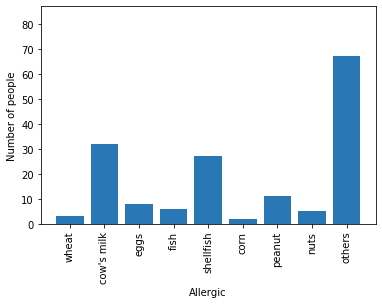

In [33]:
# 1 DBQ920 - Having food allergies
# 2 DBQ925a - Allergic to wheat
# 3 DBQ925b - Allergic to cow's milk
# 4 DBQ925c - Allergic to eggs
# 5 DBQ925d - Allergic to fish
# 6 DBQ925e - Allergic to shellfish
# 7 DBQ925f - Allergic to corn
# 8 DBQ925g - Allergic to peanut
# 9 DBQ925h - Allergic to other nuts
# 10 DBQ925i - Allergic to soy products
# 11 DBQ925j - Allergic to other foods


a = ["DBQ925a", "DBQ925b", "DBQ925c", "DBQ925d", "DBQ925e", "DBQ925f", 
     "DBQ925g", "DBQ925h", "DBQ925j"] 

q = "SELECT COUNT(*) FROM patients p WHERE p."
x = ("wheat","cow's milk", "eggs","fish", "shellfish", "corn", "peanut", "nuts", "others")

y = []
for row in c.execute(q+a[0]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[1]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[2]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[3]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[4]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[5]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[6]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[7]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[8]+"_b = 1"):
 y.append(int(row[0]))

print(y)
y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Allergic')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff38ae66c18>],
      dtype=object)

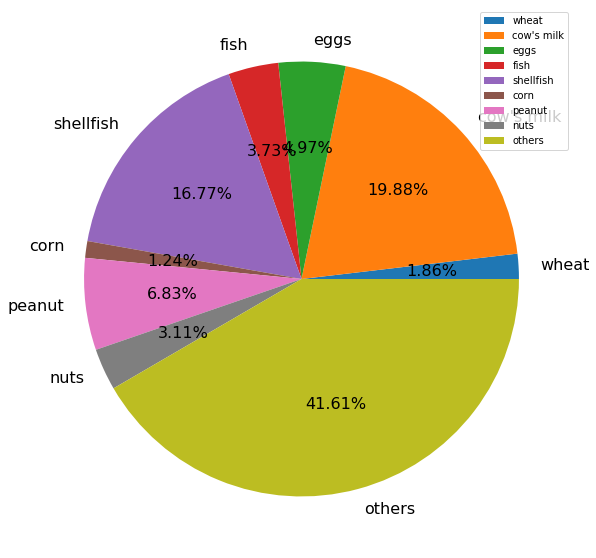

In [34]:

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%.2f%%',fontsize=16)

[491, 304, 373, 30, 79, 766, 571, 681]


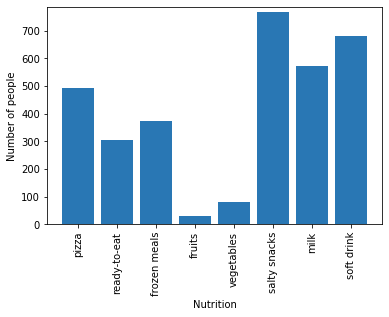

In [17]:
# DBD900 - of meals from fast food or pizza place
# DBD905 - of ready-to-eat foods in past 30 days
# DBD910 - of frozen meals/pizza in past 30 days

# CBD010 - Anyone in the family on a special diet
# CBQ020 - Fruits available at home
# CBQ030 - Dark green vegetables available at home
# CBQ040 - Salty snacks available at home
# CBQ050 - Fat-free/low fat milk available at home
# CBQ060 - Soft drinks available at home


a = ["DBD900", "DBD905", "DBD910","CBQ020","CBQ030","CBQ040","CBQ050","CBQ060"] 

q = "SELECT COUNT(*) FROM patients p WHERE p."
x = ("pizza","ready-to-eat", "frozen meals","fruits","vegetables", "salty snacks","milk","soft drink")

y = []
for row in c.execute(q+a[0]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[1]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[2]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[3]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[4]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[5]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[6]+"_b = 1"):
 y.append(int(row[0]))
for row in c.execute(q+a[7]+"_b = 1"):
 y.append(int(row[0]))
# for row in c.execute(q+a[8]+"_b = 1"):
#  y.append(int(row[0]))

print(y)
y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Nutrition')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

### Habits 

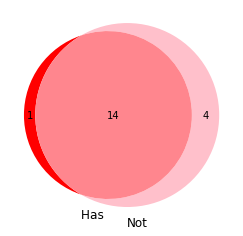

In [18]:
# from matplotlib import venn3, venn3_circles
 
registers = ["DBQ010_b", "DBQ700_b", "DBQ197_b", "DBQ229_b", "DBQ235A_b", "DBD895_b", "DBD900_b", "DBD905_b", "DBD910_b", "DBQ920_b", "DBQ925A_b", "DBQ925B_b", "DBQ925C_b", "DBQ925D_b", "DBQ925E_b", "DBQ925F_b", "DBQ925G_b", "DBQ925H_b", "DBQ925I_b", "DBQ925J_b"]

set1 = []
set2 = []

for row in c.execute("SELECT f.LBXFER_b " + (", ".join(registers)) + " FROM patients JOIN ferritin AS f ON f.SEQN = patients.SEQN"):
#     print(row)
    if row[0] == 1:
        for i, r in enumerate(registers):
            if row[i] == 1 and r not in set1:
                set1.append(r)
    if row[0] == 0:
        for i, r in enumerate(registers):
            if row[i] == 1 and r not in set2:
                set2.append(r)

# print(len(set1))
# print(len(set2))
# print(len(set3))
    
                
venn2([set(set1), set(set2)], set_labels = ("Has ", "Not"), alpha =1, set_colors=['red','pink'])

plt.show()

### Dendrograms (Nhanes)

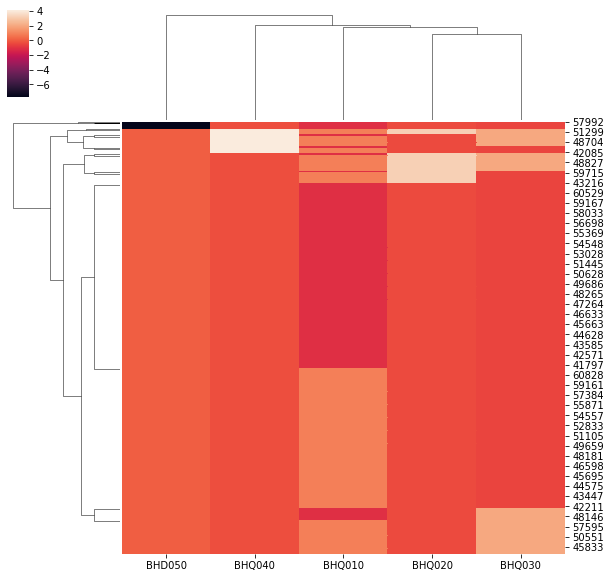

In [19]:
# Data set
queries = []
bowel_health = "b.SEQN, b.BHQ010_b, b.BHQ020_b, b.BHQ030_b, b.BHQ040_b, b.BHD050_b "
registers = bowel_health
q = "SELECT "+registers+" FROM patients p JOIN bowel_health AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN","BHQ010", "BHQ020", "BHQ030", "BHQ040", "BHD050"]
with open('f.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('f.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

sns.clustermap(df, metric = "euclidean" , z_score=1)


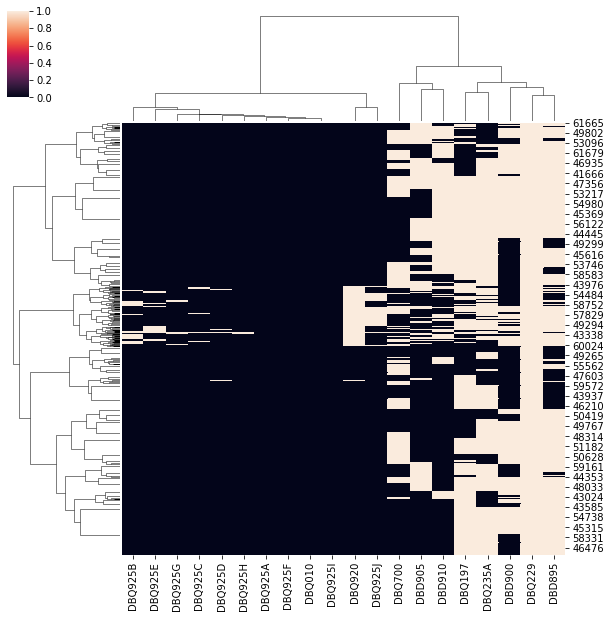

In [20]:
# Data set
queries = []
nutrition = "b.SEQN, b.DBQ010_b, b.DBQ700_b, b.DBQ197_b, b.DBQ229_b, b.DBQ235A_b, b.DBD895_b, b.DBD900_b, b.DBD905_b, b.DBD910_b, b.DBQ920_b, b.DBQ925A_b, b.DBQ925B_b, b.DBQ925C_b, b.DBQ925D_b, b.DBQ925E_b, b.DBQ925F_b, b.DBQ925G_b, b.DBQ925H_b, b.DBQ925I_b, b.DBQ925J_b "
q = "SELECT "+nutrition+" FROM patients p JOIN nutrition AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN", "DBQ010", "DBQ700", "DBQ197", "DBQ229", "DBQ235A", 
    "DBD895", "DBD900", "DBD905", "DBD910", "DBQ920", "DBQ925A", "DBQ925B", 
    "DBQ925C", "DBQ925D", "DBQ925E", "DBQ925F", "DBQ925G", "DBQ925H",
    "DBQ925I", "DBQ925J"]
with open('n.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('n.csv')
df = df.set_index('SEQN')
del df.index.name
df

#normalized
# df_norm_col=(df-df.mean())/df.std()

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

sns.clustermap(df, metric = "euclidean", method="ward", robust=True)


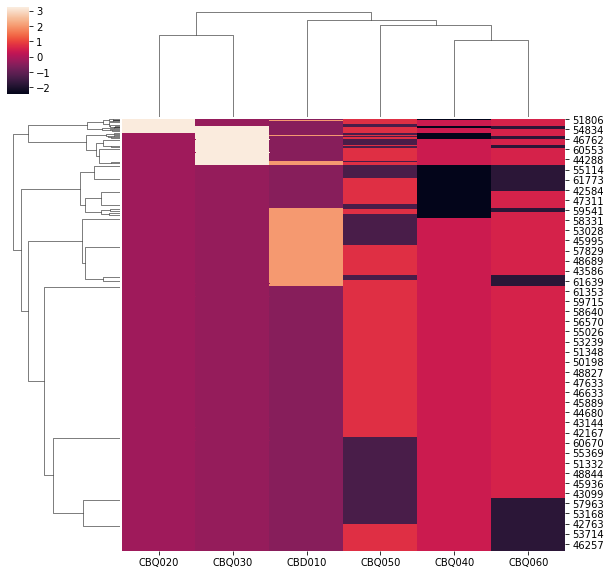

In [21]:
# Data set
queries = []
consumer_behavior = "b.SEQN, b.CBD010_b, b.CBQ020_b, b.CBQ030_b, b.CBQ040_b, b.CBQ050_b, b.CBQ060_b "
q = "SELECT "+consumer_behavior+" FROM patients p JOIN consumer_behavior AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = [ "SEQN", "CBD010", "CBQ020", "CBQ030", "CBQ040", "CBQ050", "CBQ060"]
with open('cconsumer_behavior.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('cconsumer_behavior.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)
sns.clustermap(df, metric = "euclidean", z_score=1, method="ward", robust=True)


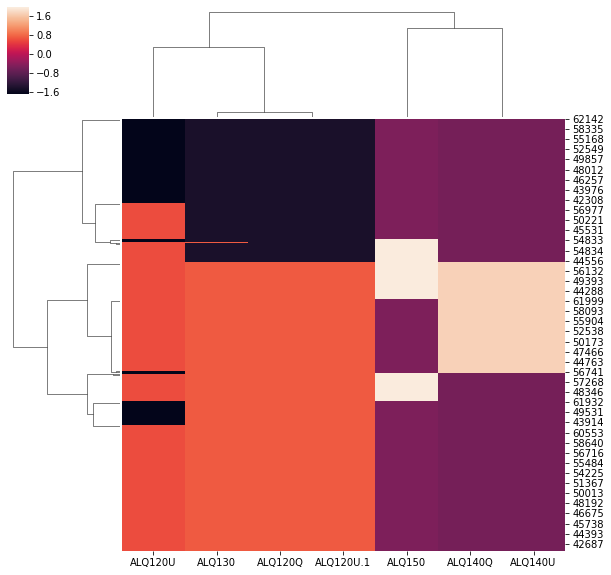

In [22]:
# Data set
queries = []
alcohol_use = "p.SEQN, b.ALQ101_b, b.ALQ120Q_b, b.ALQ120U_b, b.ALQ130_b, b.ALQ140Q_b, b.ALQ140U_b, b.ALQ150_b "
q = "SELECT "+alcohol_use+" FROM patients p JOIN alcohol_use AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN", "ALQ120U", "ALQ120Q", "ALQ120U", "ALQ130", "ALQ140Q", "ALQ140U", "ALQ150"]
with open('alcohol_use.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('alcohol_use.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)
sns.clustermap(df, metric = "euclidean" , z_score=1, method="ward", robust=True)

### Network (from Machine Learning dataset)

In [23]:
c.execute("DROP TABLE IF EXISTS exams")
conn.commit()
c.execute('''CREATE TABLE exams(
  SEQN integer,
  Mouth integer,
  Oesophagus integer,
  Stomach integer,
  Duodenum integer,
  Ileum integer,
  AColon integer,
  TColon integer,
  DColon integer,
  Rectum integer,
  Perianal integer,
  Mouth_h integer,
  Oesophagus_h integer,
  Stomach_h integer,
  Duodenum_h integer,
  Ileum_h integer,
  AColon_h integer,
  TColon_h integer,
  DColon_h integer,
  Rectum_h integer,
  Perianal_h integer,
  Diagnosis text
)''')

c.execute("CREATE INDEX id_exams on exams  (SEQN)")



In [24]:
with open("data/endoscopy.csv", mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM exams WHERE SEQN = '" +row["SEQN"] + "'")
         if c.fetchone() == None:
            c.execute("INSERT INTO exams (SEQN, Mouth, Oesophagus, Stomach, Duodenum, Ileum, AColon, TColon, DColon, Rectum, Perianal) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (
                row["SEQN"], row["Mouth"], row["Oesophagus"], row["Stomach"],
                row["Duodenum"], row["Ileum"], row["AColon"], row["TColon"], row["DColon"], row["Rectum"], row["Perianal"]))
conn.commit()

with open("data/histology.csv", mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("UPDATE exams SET Mouth_h ="+ row["Mouth"]+\
                      ", Oesophagus_h = "+row["Oesophagus"]+" , Stomach_h  ="+ row["Stomach"]+\
                      ", Duodenum_h = "+row["Duodenum"]+" , Ileum_h = "+ row["Ileum"]+\
                      " , AColon_h = "+ row["AColon"]+", TColon_h = "+row["TColon"]+\
                      ", DColon_h ="+ row["DColon"]+" , Rectum_h = "+ row["Rectum"]+\
                      " , Perianal_h = "+row["Perianal"]+", Diagnosis = '"+row["Diagnosis"]+"' "+\
                      " WHERE SEQN = '"+row['SEQN'] + "'")
conn.commit()

# for row in c.execute("SELECT * FROM exams"):
#     print(row)

In [25]:
registers = ["Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon",
             "DColon", "Rectum_h", "Perianal_h", "Mouth_h", "Oesophagus_h", "Stomach_h", "Duodenum_h",
            "Ileum_h", "AColon_h", "TColon_h","DColon_h", "Rectum_h", "Perianal_h" ]
                 
tables = ["histology", "endoscopy"]

queries = []
r = ""
for i in range(0, len(registers)-2):
   for j in range(i+1, len(registers)-1):  
        q = "SELECT e."+registers[i]+", e."+registers[j]+", COUNT(*) FROM exams e "+\
        "WHERE e."+registers[i]+" = 1 AND e."+registers[j]+" = 1 "
        for row in c.execute(q):
            if row[2] >= 1:
                r = [registers[i], registers[j],str(row[2])]
#                 print(r)
                queries.append(r)
with open('exams.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for query in queries:
        result_writer.writerow(query)

/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Numbe

(23.760067992401474, 816.142698427568, -6.6824449469048695, 535.3590706166547)

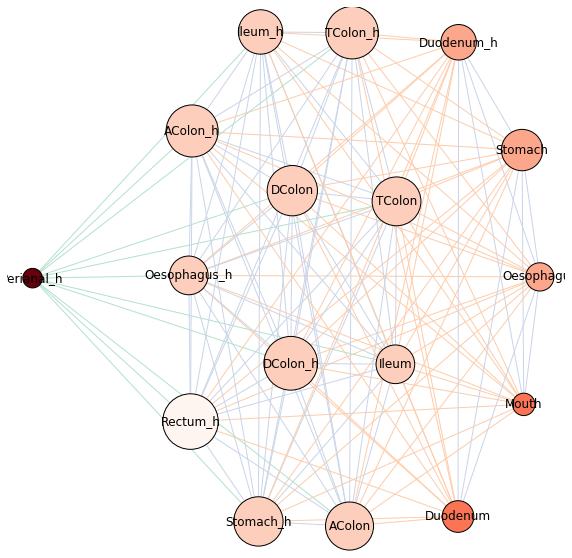

In [26]:
G = nx.Graph()

with open('exams.csv', mode='r') as edges: 
  for edge in edges:
     # print(edge)
     e = edge.split(",")
     G.add_edge(e[0],e[1],weight=int(e[2]))
# position is stored as node attribute data for random_geometric_graph
# G = nx.convert_node_labels_to_integers(G)
# pos = nx.random_layout(G)
pos =  nx.drawing.nx_agraph.graphviz_layout(G,prog='sfdp')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
  x, y = pos[n]
  d = (x - 0.5)**2 + (y - 0.5)**2
  if d < dmin:
     ncenter = n
     dmin = d

# color by path length from node near center
# p = dict(nx.pagerank(G))
# p = dict(nx.katz_centrality(G))
# p = dict(nx.clustering(G))
p = dict(nx.eigenvector_centrality(G))
# p = dict(nx.single_source_shortest_path_length(G, ncenter))
# e = dict(nx.edge_betweenness_centrality(G))
e = dict(nx.edge_load_centrality(G))
# k = dict(nx.degree_centrality(G))
# k = dict(nx.closeness_centrality(G))
k = dict(nx.pagerank(G))

edges,weights = zip(*nx.edge_betweenness_centrality(G).items())

plt.figure(figsize=(10, 10))
nx.draw_networkx_labels(G, pos, font_size=12)
# node_color = [float(H.degree(v)) for v in H]
nx.draw_networkx_edges(G, pos, nodelist=[ncenter],  edge_alpha=0.5, edge_linewidth=0.1, edge_color=weights, edge_cmap=plt.cm.Pastel2_r)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                    node_size=[( 100 +(v*30000) ) for v in k.values()],
                    node_color=list(p.values()), with_labels=True,
                    cmap=plt.cm.Reds_r,  linewidth=2, edgecolors="k")
plt.axis('Off')

### Venn diagram

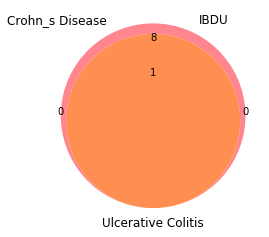

In [27]:
# from matplotlib import venn3, venn3_circles
 
registers = ["Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon",
             "DColon", "Rectum", "Perianal" ]
set1 = []
set2 = []
set3 = []

for row in c.execute("SELECT Diagnosis, " + (", ".join(registers)) + " FROM exams"):
#     print(row[20])
    if row[0] == "Crohn_s Disease":
        for i, r in enumerate(registers):
            if row[i] == 1 and r not in set1:
                set1.append(r)
    if row[0] == "IBDU":
        for i, r in enumerate(registers):
            if row[i] == 1 and r not in set2:
                set2.append(r)
    if row[0] == "Ulcerative Colitis":
        for i, r in enumerate(registers):
            if row[i] == 1 and r not in set3:
                set3.append(r)

# print(len(set1))
# print(len(set2))
# print(len(set3))
    
                
venn3([set(set1), set(set2), set(set3)], set_labels = ("Crohn_s Disease", "IBDU", "Ulcerative Colitis"), alpha =1, set_colors=['red','pink','orange'])

plt.show()

### Histology

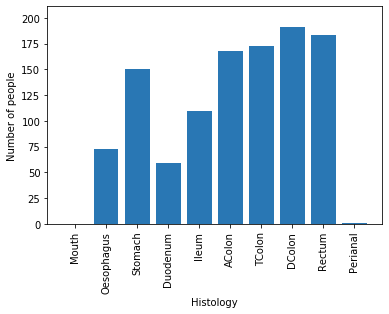

In [28]:
q = "SELECT COUNT(*) FROM exams e WHERE "

registers = ["Mouth_h", "Oesophagus_h", "Stomach_h", "Duodenum_h", "Ileum_h", "AColon_h", "TColon_h", "DColon_h", "Rectum_h", "Perianal_h"]
x = ("Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal")
y = []
for row in c.execute(q+registers[0]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[1]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[2]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[3]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[4]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[5]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[6]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[7]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[8]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[9]+" = 1 "):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Histology')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

### Endoscopy

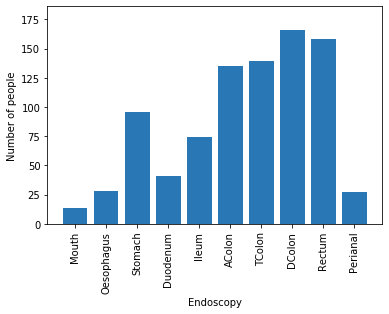

In [29]:
q = "SELECT COUNT(*) FROM exams e WHERE "

registers = ["Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal"]
x = ("Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal")
y = []
for row in c.execute(q+registers[0]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[1]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[2]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[3]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[4]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[5]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[6]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[7]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[8]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[9]+" = 1 "):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Endoscopy')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

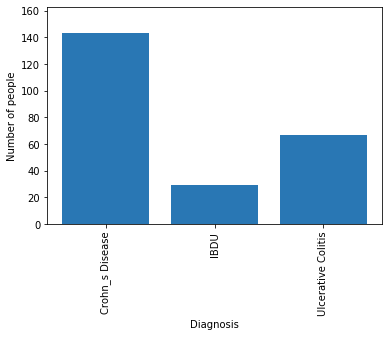

In [30]:
q = "SELECT COUNT(*) FROM exams WHERE Diagnosis = "

d = ["'Crohn_s Disease'", "'IBDU'", "'Ulcerative Colitis'"]
x = ("Crohn_s Disease", "IBDU", "Ulcerative Colitis")
y = []
for row in c.execute(q+d[0]):
 y.append(int(row[0]))
for row in c.execute(q+d[1]):
 y.append(int(row[0]))
for row in c.execute(q+d[2]):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Diagnosis')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()